# Odometry Dead Reconning

### constants

In [62]:
import numpy as np

WHEEL_DIAM = 254/100    # wheel diameter (dm)
BOT_WIDTH = 393.7/100   # distance from center of left wheel to center of right (dm)
SKID_FACTOR = 1.85  # made up scalar to account for effect of skid steering effective width for rotation

WHEEL_CIRC = np.pi*WHEEL_DIAM    # wheel circumference (mm)
ENC_TICK_LEN = WHEEL_CIRC / 360  # length of one encoder tick (mm)

### load data

In [67]:
import slam.load_data as load_data
from slam.slam_utils import get_local_movement

enc_path = '../data/Encoders20'
lidar_path = '../data/Hokuyo20'

# Front Right, Front Left,... encoder readings, time
FR_enc, FL_enc, RR_enc, RL_enc, enc_ts = load_data.get_encoder(enc_path)

R_enc = (FR_enc + RR_enc) / 2  #average value of right encoders
L_enc = (FL_enc + RL_enc) / 2  #average value of left encoders

local_mv = get_local_movement(R_enc, L_enc,
                            enc_tick_len = ENC_TICK_LEN, 
                            bot_width = BOT_WIDTH * SKID_FACTOR)

In [68]:
from slam.slam_map import Bot

bot20 = Bot()
for mv in local_mv:
    bot20.move(mv)

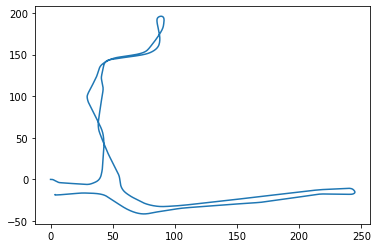

In [70]:
bot20.plot_trajectory()

# Simultaneous Localization and Mapping (SLAM)

##

### Load Pickled Maps

In [46]:
import pickle as pk

map20 = pk.load(open('./pickles/slam20.pickle', 'rb'))[300:700,300:700]
map21 = pk.load(open('./pickles/slam21.pickle', 'rb'))
map22 = pk.load(open('./pickles/slam22.pickle', 'rb'))[150:550,250:650]
map23 = pk.load(open('./pickles/slam23.pickle', 'rb'))[280:680, 150:550]
map24 = pk.load(open('./pickles/slam24.pickle', 'rb'))[100:500,300:700]

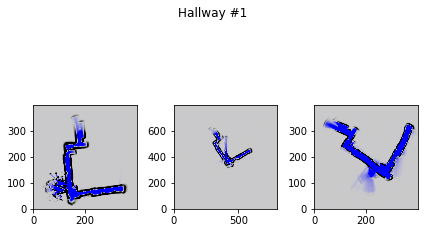

In [57]:
import matplotlib.pyplot as plt
from slam.slam_utils import slam_cmap

plt.subplot(1,3,1)
plt.imshow(map20.T, origin='lower', cmap=slam_cmap, vmin=-30, vmax=30)
plt.subplot(1,3,2)
plt.imshow(map21.T, origin='lower', cmap=slam_cmap, vmin=-30, vmax=30)
plt.subplot(1,3,3)
plt.imshow(map22.T, origin='lower', cmap=slam_cmap, vmin=-30, vmax=30)

plt.suptitle('Hallway #1')
plt.tight_layout()

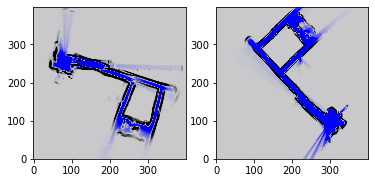

In [55]:
plt.subplot(1,2,1)
plt.imshow(map23.T, origin='lower', cmap=slam_cmap, vmin=-30, vmax=30)
plt.subplot(1,2,2)
plt.imshow(map24.T, origin='lower', cmap=slam_cmap, vmin=-30, vmax=30)